In [2]:
import os
import tensorflow as tf
from transformers import AutoTokenizer, TFAutoModel
from PIL import Image
import numpy as np
import datasets
from tqdm import tqdm
import pickle

In [3]:
# Define paths
image_folder = "/local_dir/Train_Images"
hf_dataset_name = "ta4tsering/Lhasa_kanjur_transcription_datasets"

In [4]:
# Load Hugging Face dataset
hf_dataset = datasets.load_dataset(hf_dataset_name, split="train")

In [5]:
def preprocess_image(image_path):
    image = Image.open(image_path).convert("L")  # Convert to black and white
    image = image.resize((1400, 70))
    image = np.array(image) / 255.0  # Normalize
    return image

In [6]:
# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("openpecha/tibetan_RoBERTa_S_e6")
model = TFAutoModel.from_pretrained("openpecha/tibetan_RoBERTa_S_e6")

2024-06-19 06:04:53.792195: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22488 MB memory:  -> device: 0, name: NVIDIA RTX A5000, pci bus id: 0000:65:00.0, compute capability: 8.6
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.bias']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaModel were not initia

In [7]:
#image preprocessing--------

In [7]:
hf_filenames = [data["filename"] for data in hf_dataset]
unique_hf_filenames = set(hf_filenames)

print("Total unique filenames in Hugging Face dataset:", len(unique_hf_filenames))


Total unique filenames in Hugging Face dataset: 133024


In [8]:
# Assuming unique_hf_filenames is your set of unique filenames

# Convert set to list for slicing
unique_hf_filenames = list(unique_hf_filenames)

# Calculate batch size (approximately 25,000 per batch)
batch_size = 10000

# Create batches
batches = []
for i in range(0, len(unique_hf_filenames), batch_size):
    batch = unique_hf_filenames[i:i + batch_size]
    batches.append(batch)

# Print number of filenames in each batch
for i, batch in enumerate(batches):
    print(f"Batch {i + 1}: {len(batch)} filenames")

# Access batches like batches[0], batches[1], ..., batches[n]


Batch 1: 10000 filenames
Batch 2: 10000 filenames
Batch 3: 10000 filenames
Batch 4: 10000 filenames
Batch 5: 10000 filenames
Batch 6: 10000 filenames
Batch 7: 10000 filenames
Batch 8: 10000 filenames
Batch 9: 10000 filenames
Batch 10: 10000 filenames
Batch 11: 10000 filenames
Batch 12: 10000 filenames
Batch 13: 10000 filenames
Batch 14: 3024 filenames


In [15]:
from PIL import Image
import numpy as np
import os
from tqdm import tqdm

# Assuming batches is a list where each element is a list of filenames for each batch
# Let's use the first batch as an example
first_batch_filenames = batches[6]

# Define your image_folder
image_folder = "/local_dir/Train_Images"

# Initialize an empty list to store processed images
images = []

# Initialize tqdm progress bar
pbar = tqdm(first_batch_filenames, desc="Loading and preprocessing images", unit="image")

# Iterate through filenames in the first batch
for filename in pbar:
    if not filename.startswith("."):  # Exclude hidden files like .DS_Store
        image_path = os.path.join(image_folder, filename)
        image = preprocess_image(image_path)
        h = {"label": filename, "image": image}
        images.append(h)
    
    # Update tqdm progress bar
    pbar.set_postfix({'Processed': len(images)})

Loading and preprocessing images: 100%|██████████| 10000/10000 [00:24<00:00, 406.85image/s, Processed=1e+4]


In [17]:
from datasets import Dataset
import numpy as np
dataset = Dataset.from_list(images)
print("done")

done


In [18]:
dataset.push_to_hub("norbujam/LG-images-6")
print("done")

Uploading the dataset shards:   0%|          | 0/16 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

done


In [10]:
hf_image_names = set([data["filename"].split(".")[0] for data in hf_dataset])

# Initialize an empty list to store processed images
images = []
pbar = tqdm(os.listdir(image_folder), desc="Loading and preprocessing images", unit="image")

# Iterate through image filenames in image_folder
for filename in pbar:
    if not filename.startswith("."):  # Exclude hidden files like .DS_Store
        image_name = filename.split(".")[0]
        if image_name in hf_image_names:
            image_path = os.path.join(image_folder, filename)
            image = preprocess_image(image_path)
            h = {"label": filename, "image": image}
            images.append(h)
    
    # Update tqdm progress bar
    pbar.set_postfix({'Processed': len(images)})

Loading and preprocessing images:   4%|▎         | 5409/149664 [00:12<05:27, 440.56image/s, Processed=4809]


KeyboardInterrupt: 

In [14]:
# Filter HF dataset to include only transcriptions corresponding to images on your computer
image_names = [filename.split(".")[0] for filename in tqdm(os.listdir(image_folder)) if not filename.startswith(".")]
hf_subset = [data for data in tqdm(hf_dataset) if data["filename"].split(".")[0] in image_names]
images = []
for filename in tqdm(os.listdir(image_folder), desc="Loading images", unit="image"):
    if not filename.startswith("."):  # Exclude hidden files like .DS_Store
        image_path = os.path.join(image_folder, filename)
        image = preprocess_image(image_path)
        h = {"label":filename,"image":image}
        images.append(h)

Loading images: 100%|██████████| 149664/149664 [04:23<00:00, 568.71image/s]


In [15]:
from datasets import Dataset
import numpy as np

In [ ]:
#make 5 batches

In [ ]:
dataset = Dataset.from_list(images)
print("done")

In [ ]:
dataset.push_to_hub("norbujam/LhasaGanjur-images")

In [ ]:
push_to_huggingface(dataset, repository_name, auth_token)
print("Dataset uploaded successfully!")

In [ ]:
#vector preprocessing---------

In [ ]:
# Load and tokenize transcriptions
transcriptions = [data["label"] for data in hf_subset]
vectors = [transcription_to_vector(transcription) for transcription in tqdm(transcriptions, desc="Processing transcriptions", unit="transcription")]


In [ ]:
file_path = 'vectors.pkl'

# Open a file in binary write mode and serialize the variable
with open(file_path, 'wb') as f:
    pickle.dump(my_variable, f)

In [ ]:
# creating dataset-------------

In [13]:
dataset = tf.data.Dataset.from_tensor_slices((images, vectors))

Loading images: 100%|█████████| 4000/4000 [00:02<00:00, 1767.70image/s]
Processing transcriptions: 100%|█| 3999/3999 [12:49<00:00,  5.20transcr


In [ ]:
import tensorflow as tf
from tqdm import tqdm

def create_dataset_with_progress(images, vectors):
    # Calculate total number of elements
    total_elements = len(images)

    # Initialize tqdm progress bar
    progress_bar = tqdm(total=total_elements, desc="Creating TensorFlow Dataset", unit="element")

    # Create TensorFlow dataset from tensor slices with tqdm progress
    dataset = tf.data.Dataset.from_tensor_slices((images, vectors))

    # Define function to update tqdm progress bar
    def update_progress(*args):
        progress_bar.update(1)

    # Apply the update_progress function to each element in the dataset
    dataset = dataset.map(lambda *args: (update_progress(*args) or args)[1:])

    # Close tqdm progress bar after dataset creation
    progress_bar.close()

    return dataset

# Example usage:
# Assuming `images` and `vectors` are already populated lists
dataset = create_dataset_with_progress(images, vectors)


In [ ]:
#same--------------

In [15]:
# Iterate over the dataset and check the shape of the elements
for image, vector in dataset.take(1):  # Take one batch from the dataset
    print("Image shape:", image.shape)
    print("Transcription vector shape:", vector.shape)


Image shape: (70, 1400)
Transcription vector shape: (1, 768)


2024-06-14 10:51:09.018534: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


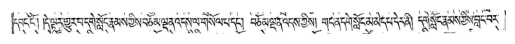

2024-06-14 10:51:11.664826: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [17]:
import matplotlib.pyplot as plt

# Take one image from the dataset
for image, _ in dataset.take(1):
    # Plot the image
    plt.imshow(image.numpy(), cmap="gray")
    plt.axis("off")
    plt.show()


In [19]:
# Take one element from the dataset
for image, vector in dataset.take(1):
    # Print the data types
    print("Image data type:", image.dtype)
    print("Transcription vector data type:", vector.dtype)


Image data type: <dtype: 'float64'>
Transcription vector data type: <dtype: 'float32'>


2024-06-14 10:51:14.564793: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [21]:
# Check the type of the dataset
print(type(dataset))


<class 'tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset'>


In [23]:
# Apply batching, caching, and prefetching to the dataset

tf_dataset=dataset

tf_dataset = tf_dataset.cache()  # Cache the dataset elements in memory
tf_dataset = tf_dataset.prefetch(tf.data.AUTOTUNE)  # Prefetch data for optimal performance


In [137]:
import tensorflow as tf
from tensorflow.keras import layers, Model

# Define the generator model
def build_generator(vector_dim, noise_dim, img_shape):
    input_vector = layers.Input(shape=(vector_dim,))
    input_noise = layers.Input(shape=(noise_dim,))
    
    # Concatenate vector and noise inputs
    x = layers.Concatenate()([input_vector, input_noise])
    
    # Dense layer
    x = layers.Dense(35*700, activation='relu')(x)

    #reshape
    x = layers.Reshape((35,700,1))(x)
    
    #conv layer
    x = layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', activation='relu')(x)
    x = layers.Conv2DTranspose(32, (5, 5), strides=(1, 1), padding='same', activation='relu')(x)

    #output layer
    output_img = layers.Conv2D(1, (5, 5), activation='tanh', padding='same')(x)
    
    return Model(inputs=[input_vector, input_noise], outputs=output_img)

# Define the discriminator model
def build_discriminator(vector_dim, img_shape):
    input_vector = layers.Input(shape=(vector_dim,))
    input_img = layers.Input(shape=img_shape)
    reshaped_img = layers.Reshape((img_shape[0], img_shape[1], 1))(input_img)
    # Convolutional layers
    x = layers.Conv2D(32, (5, 5), strides=(2, 2), padding='valid', activation='relu')(reshaped_img)
    x = layers.Conv2D(16, (5, 5), strides=(3, 3), padding='valid', activation='relu')(x)
    
    # Flatten
    x = layers.Flatten()(x)
    
    # Concatenate with vector input
    x = layers.Concatenate()([x, input_vector])
    
    # Dense layer
    x = layers.Dense(128, activation='relu')(x)
    
    # Output layer
    output = layers.Dense(1, activation='sigmoid')(x)
    
    return Model(inputs=[input_vector, input_img], outputs=output)

# Define the dimensions
vector_dim = 768  # Dimensionality of the transcription vectors
noise_dim = 100  # Dimensionality of the noise input
img_shape = (70, 1400)  # Shape of the generated image

# Build the generator and discriminator models
generator = build_generator(vector_dim, noise_dim, img_shape)
discriminator = build_discriminator(vector_dim, img_shape)

# Print model summaries
print("Generator summary:")
generator.summary()
print("\nDiscriminator summary:")
discriminator.summary()


Generator summary:


Model: "functional_49"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_58      │ (None, 768)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_59      │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_25      │ (None, 868)       │          0 │ input_layer_58[0… │
│ (Concatenate)       │                   │            │ input_layer_59[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_35 (Dense)    │ (None, 24500)     │ 21,290,500 │ concatenate_25[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_25          │ (None, 35, 700,   │          0 │ dense_35[0][0]    │
│ (Reshape)           │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_32 │ (None, 70, 1400,  │      1,664 │ reshape_25[0][0]  │
│ (Conv2DTranspose)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_33 │ (None, 70, 1400,  │     51,232 │ conv2d_transpose… │
│ (Conv2DTranspose)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_35 (Conv2D)  │ (None, 70, 1400,  │        801 │ conv2d_transpose… │
│                     │ 1)                │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 21,344,197 (81.42 MB)

 Trainable params: 21,344,197 (81.42 MB)

 Non-trainable params: 0 (0.00 B)


Discriminator summary:


Model: "functional_51"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_61      │ (None, 70, 1400)  │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_26          │ (None, 70, 1400,  │          0 │ input_layer_61[0… │
│ (Reshape)           │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_36 (Conv2D)  │ (None, 33, 698,   │        832 │ reshape_26[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_37 (Conv2D)  │ (None, 10, 232,   │     12,816 │ conv2d_36[0][0]   │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_10          │ (None, 37120)     │          0 │ conv2d_37[0][0]   │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_60      │ (None, 768)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_26      │ (None, 37888)     │          0 │ flatten_10[0][0], │
│ (Concatenate)       │                   │            │ input_layer_60[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_36 (Dense)    │ (None, 128)       │  4,849,792 │ concatenate_26[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_37 (Dense)    │ (None, 1)         │        129 │ dense_36[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 4,863,569 (18.55 MB)

 Trainable params: 4,863,569 (18.55 MB)

 Non-trainable params: 0 (0.00 B)

In [95]:
# Define the loss functions
cross_entropy = tf.keras.losses.BinaryCrossentropy()

# Define the discriminator loss
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

# Define the generator loss
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

# Define the optimizers
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [97]:
# Define the batch size
batch_size = 32

In [99]:
# Define the training function
@tf.function
def train_step(images, vectors):
    noise = tf.random.normal([batch_size, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator([vectors, noise], training=True)

        real_output = discriminator([vectors, images], training=True)
        fake_output = discriminator([vectors, generated_images], training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [125]:
# Define the training loop
def train(dataset, epochs):
    total_batches = len(dataset)
    for epoch in tqdm(range(epochs)):
        # Initialize tqdm progress bar
        progress_bar = tqdm(total=total_batches, desc=f'Epoch {epoch + 1}/{epochs}', unit='batch')
        for image_batch, vector_batch in dataset:
            train_step(image_batch, vector_batch)
            progress_bar.update(1)
        progress_bar.close()

In [127]:
import tensorflow as tf

# Iterate over the dataset and print dimensions of vectors and images
for images, vectors in tf_dataset:
    print("Image shape:", images.shape)
    print("Vector shape:", vectors.shape)


Image shape: (70, 1400)
Vector shape: (1, 768)
Image shape: (70, 1400)
Vector shape: (1, 768)
Image shape: (70, 1400)
Vector shape: (1, 768)
Image shape: (70, 1400)
Vector shape: (1, 768)
Image shape: (70, 1400)
Vector shape: (1, 768)
Image shape: (70, 1400)
Vector shape: (1, 768)
Image shape: (70, 1400)
Vector shape: (1, 768)
Image shape: (70, 1400)
Vector shape: (1, 768)
Image shape: (70, 1400)
Vector shape: (1, 768)
Image shape: (70, 1400)
Vector shape: (1, 768)
Image shape: (70, 1400)
Vector shape: (1, 768)
Image shape: (70, 1400)
Vector shape: (1, 768)
Image shape: (70, 1400)
Vector shape: (1, 768)
Image shape: (70, 1400)
Vector shape: (1, 768)
Image shape: (70, 1400)
Vector shape: (1, 768)
Image shape: (70, 1400)
Vector shape: (1, 768)
Image shape: (70, 1400)
Vector shape: (1, 768)
Image shape: (70, 1400)
Vector shape: (1, 768)
Image shape: (70, 1400)
Vector shape: (1, 768)
Image shape: (70, 1400)
Vector shape: (1, 768)
Image shape: (70, 1400)
Vector shape: (1, 768)
Image shape: 

2024-06-14 11:17:30.939558: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [129]:
mydataset=tf_dataset.batch(batch_size, drop_remainder=True)

In [131]:
def reshape_image(image, label):
    # Remove the singleton dimension
    label_reshaped = tf.squeeze(label, axis=1)
    return image, label_reshaped

# Apply the reshape_image function to the dataset
mydataset = mydataset.map(reshape_image)

In [133]:
# Iterate over the dataset and print dimensions of vectors and images
for i,j in mydataset:
    print("Image shape:", i.shape)
    print("Image shape:", j.shape)
    


Image shape: (32, 70, 1400)
Image shape: (32, 768)
Image shape: (32, 70, 1400)
Image shape: (32, 768)
Image shape: (32, 70, 1400)
Image shape: (32, 768)
Image shape: (32, 70, 1400)
Image shape: (32, 768)
Image shape: (32, 70, 1400)
Image shape: (32, 768)
Image shape: (32, 70, 1400)
Image shape: (32, 768)
Image shape: (32, 70, 1400)
Image shape: (32, 768)
Image shape: (32, 70, 1400)
Image shape: (32, 768)
Image shape: (32, 70, 1400)
Image shape: (32, 768)
Image shape: (32, 70, 1400)
Image shape: (32, 768)
Image shape: (32, 70, 1400)
Image shape: (32, 768)
Image shape: (32, 70, 1400)
Image shape: (32, 768)
Image shape: (32, 70, 1400)
Image shape: (32, 768)
Image shape: (32, 70, 1400)
Image shape: (32, 768)
Image shape: (32, 70, 1400)
Image shape: (32, 768)
Image shape: (32, 70, 1400)
Image shape: (32, 768)
Image shape: (32, 70, 1400)
Image shape: (32, 768)
Image shape: (32, 70, 1400)
Image shape: (32, 768)
Image shape: (32, 70, 1400)
Image shape: (32, 768)
Image shape: (32, 70, 1400)
Ima

2024-06-14 11:17:32.945937: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [135]:
# Train the CGAN
train(mydataset, epochs=10)

  0%|                                           | 0/10 [01:34<?, ?it/s]


KeyboardInterrupt: 

In [632]:
import tensorflow as tf
from transformers import AutoTokenizer, AutoModel

# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("openpecha/tibetan_RoBERTa_S_e6")
model = AutoModel.from_pretrained("openpecha/tibetan_RoBERTa_S_e6")

# Define the Tibetan text
tibetan_text = "ཀྱང་ཤེས་རབ་ཀྱི་ཕ་རོལ་ཏུ་ཕྱིན་པ་མ་ཡིན། བྱང་ཆུབ་ཀྱི་ཡན་ལག་རྣམས་ཀྱི་དེ་བཞིན་ཉིད་ལས་གུད་ནའང་ཤེས་རབ་ཀྱི་ཕ་རོལ་ཏུ་ཕྱིན་པ་མེད་དོ། །བྱང་ཆུབ་ཀྱི་ཡན་ལག་རྣམས་"

# Tokenize the text
tokens = tokenizer(tibetan_text, return_tensors="pt")

# Pass the tokens through the model to get the embeddings
with tf.device('/CPU:0'):
    outputs = model(**tokens)

# Get the embeddings
embeddings = outputs.last_hidden_state

# Convert embeddings to a numpy array

# Assuming word_vector is the tensor you want to convert
# Detach the tensor from the computation graph
word_vector_detached = embeddings.detach()

# Convert the detached tensor to a NumPy array
tibetan_vector = word_vector_detached.numpy()


Some weights of RobertaModel were not initialized from the model checkpoint at openpecha/tibetan_RoBERTa_S_e6 and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


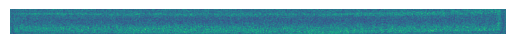

In [634]:
import tensorflow as tf
import numpy as np

# Normalize the Tibetan vector
normalized_tibetan_vector = tf.keras.utils.normalize(tf.reduce_mean(tibetan_vector, axis=1))

# Define the noise dimension
noise_dim = 100

# Generate random noise
noise = tf.random.normal([1, noise_dim])

# Concatenate the Tibetan vector and noise
input_data = [normalized_tibetan_vector, noise]

# Generate an image using the generator
generated_image = generator(input_data, training=False)

# Rescale the pixel values from [-1, 1] to [0, 1]
generated_image = (generated_image + 1) / 2

# Visualize the generated image
import matplotlib.pyplot as plt
plt.imshow(generated_image[0])
plt.axis('off')
plt.show()
